In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Load the data
oecd_bli = pd.read_csv('oecd_bli_2015.csv', 
                       thousands=',')

gdp_per_capita = pd.read_csv( 'gdp_per_capita.csv',
                            thousands=',',
                            delimiter='\t',
                            encoding='latin1',
                            na_values='n/a')

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

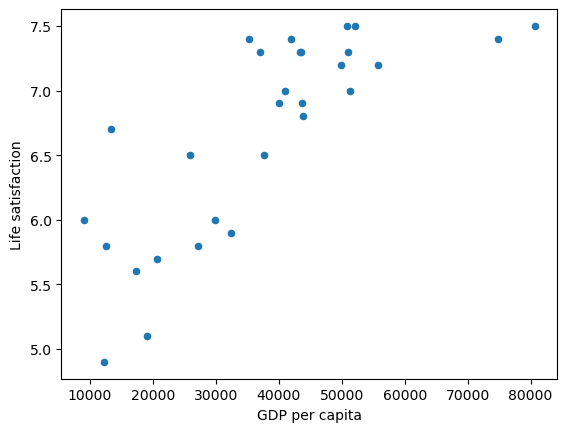

In [5]:
# Visualize the data
country_stats.plot(kind='scatter',
                   x='GDP per capita',
                   y='Life satisfaction')
plt.show()

In [6]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [7]:
#fitting the data
model.fit(X,y)

LinearRegression()

In [8]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.14803262]]


In [9]:
# Make a prediction for Cyprus
X_new = [[25647]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.25341082]]


In [10]:
# Make a prediction for Cyprus
X_new = [[87]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[5.37319297]]
